# ✅ LM Studio 同款 Colab 最終版

支援：PDF ➜ Text ➜ OCR ➜ Vision LLM ➜ JSON ➜ Cloudflare Tunnel 🔥

In [ ]:
# ======================================
# 🏗️ 安裝必要工具
# ======================================
!apt-get update
!apt-get install -y poppler-utils tesseract-ocr
!pip install -q pdfplumber pytesseract cloudflared requests

import pytesseract
import pdfplumber
import base64, json, time, shutil, subprocess, requests
from IPython.display import clear_output

print("✅ 必要套件已安裝！")

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,092 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,752 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages 

In [ ]:
import shutil
import subprocess
import time

# ======================================
# ⚙️ 啟動 Ollama + Cloudflared
# ======================================

model_name = "llava:13b"  # 也可以 llava:7b gemma3:12b  gemma3:27b
ollama_url = "http://localhost:11434"

# ✅ 檢查是否安裝
if shutil.which("ollama"):
    print("✅ Ollama 已安裝")
else:
    print("⏬ 安裝 Ollama ...")
    !curl https://ollama.ai/install.sh | sh

# ✅ Kill 舊 Serve
!pkill -f "ollama serve" || echo "No old process."

# ✅ 啟動 Serve + Debug
print("🚀 啟動 Serve ...")
!OLLAMA_LOG_LEVEL=debug nohup ollama serve &

# ✅ 等待 Serve Ready
print("⏳ 等待 Serve Ready ...")
for i in range(10):
    try:
        r = requests.get(ollama_url, timeout=2)
        if r.status_code == 200:
            print("✅ Ollama Serve Ready!")
            break
    except:
        pass
    time.sleep(2)

# ✅ 再判斷模型
print(f"檢查模型 {model_name} ...")
list_output = subprocess.getoutput("ollama list")
if model_name in list_output:
    print(f"✅ 已存在模型：{model_name}")
else:
    print(f"⏬ Pull 模型：{model_name} ...")
    !ollama pull {model_name}

# ✅ Cloudflared
ollama_url = "http://localhost:11434"
!pkill -f "cloudflared tunnel" || echo "No old tunnel."
!wget -q https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb -O cloudflared.deb
!dpkg -i cloudflared.deb

print("⏳ 建立 Cloudflare Tunnel ...")

proc = subprocess.Popen(
    ["cloudflared", "tunnel", "--url", ollama_url],
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT,
    universal_newlines=True
)

public_url = None
for i in range(30):
    line = proc.stdout.readline()
    print(line.strip())
    if "trycloudflare.com" in line:
        import re
        m = re.search(r'(https://[\w\.-]+\.trycloudflare\.com)', line)
        if m:
            public_url = m.group(1)
            break
    time.sleep(1)

if public_url:
    print(f"✅ Public URL: {public_url}")
else:
    print("❌ Cloudflared 啟動失敗")


✅ Ollama 已安裝
^C
🚀 啟動 Serve ...
nohup: appending output to 'nohup.out'
⏳ 等待 Serve Ready ...
✅ Ollama Serve Ready!
檢查模型 llava:13b ...
✅ 已存在模型：llava:13b
^C
(Reading database ... 126315 files and directories currently installed.)
Preparing to unpack cloudflared.deb ...
Unpacking cloudflared (2025.7.0) over (2025.7.0) ...
Setting up cloudflared (2025.7.0) ...
Processing triggers for man-db (2.10.2-1) ...
⏳ 建立 Cloudflare Tunnel ...
2025-07-08T03:40:54Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudfla

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
poppler-utils is already the newest version (22.02.0-2ubuntu0.8).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.


Saving Order_Sample_01.pdf to Order_Sample_01.pdf
✅ 已上傳: Order_Sample_01.pdf
✅ PDF 機讀有抓到文字


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28784 (\N{CJK UNIFIED IDEOGRAPH-7070}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38542 (\N{CJK UNIFIED IDEOGRAPH-968E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


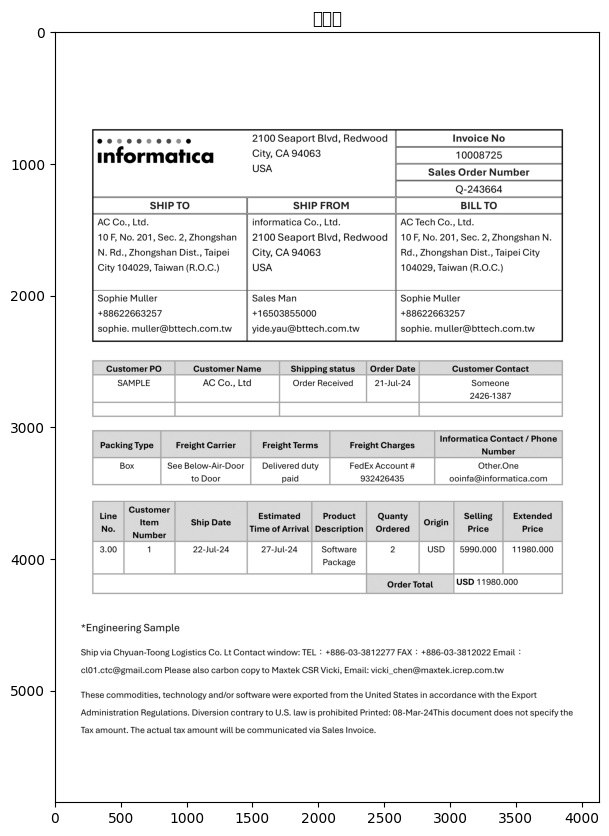

✅ 已儲存圖片: page_1.jpg
✅ OCR 文字示例：
informatica —s “494068 10008725
USA Sales Order Number
Q-243664
AC Co., Ltd. informatica Co., Ltd. AC Tech Co., Ltd.
10 F, No. 201, Sec. 2, Zhongshan | 2100 Seaport Blvd, Redwood | 10F, No. 201, Sec. 2, Zhongshan N.
N. Rd., Zhongshan Dist., Taipei City, CA 94063 Rd., Zhongshan Dist., Taipei City
Cit
✅ 組好的 Prompt ：

---

【machine_text】
2100 Seaport Blvd, Redwood Invoice No
City, CA 94063 10008725
USA
Sales Order Number
Q-243664
SHIP TO SHIP FROM BILL TO
AC Co., Ltd. informatica Co., Ltd. AC Tech Co., Ltd.
10 F, No. 201, Sec. 2, Zhongshan 2100 Seaport Blvd, Redwood 10 F, No. 201, Sec. 2, Zhongshan N.
N. Rd., Zhongshan Dist., Taipei City, CA 94063 Rd., Zhongshan Dist., Taipei City
City 104029, Taiwan (R.O.C.) USA 104029, Taiwan (R.O.C.)
Sophie Muller Sales Man Sophie Muller
+88622663257 +16503855000 +88622663257
sophie. muller@bttech.com.tw yide.yau@bttech.com.tw sophie. muller@bttech.com.tw
Customer PO Customer Name Shipping status Order Date Customer Cont

In [ ]:
# ======================================
# ✅ 安裝套件
# ======================================
!pip install pdf2image pdfplumber pytesseract opencv-python-headless matplotlib
!apt-get install -y poppler-utils tesseract-ocr

import os
import pdfplumber
import pytesseract
from pdf2image import convert_from_path
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt

# ======================================
# ✅ 設定檔名 & 參數
# ======================================
pdf_filename = "Order_Sample_01.pdf"
image_path = "page_1.jpg"
dpi = 500

# ======================================
# ✅ 檢查是否已存在 PDF
# ======================================
if not os.path.exists(pdf_filename):
    uploaded = files.upload()
    pdf_filename = list(uploaded.keys())[0]
    print(f"✅ 已上傳: {pdf_filename}")
else:
    print(f"✅ 已存在: {pdf_filename}")

# ======================================
# ✅ 1️⃣ PDF 機讀文字
# ======================================
machine_text = ""
with pdfplumber.open(pdf_filename) as pdf:
    for page in pdf.pages:
        text = page.extract_text()
        if text:
            machine_text += text.strip() + "\n"

if machine_text.strip():
    print("✅ PDF 機讀有抓到文字")
else:
    print("⚠️ PDF 機讀無文字，改用 OCR")

# ======================================
# ✅ 2️⃣ PDF ➜ 圖片（轉灰階） ➜ 整頁 OCR
# ======================================

images = convert_from_path(pdf_filename, dpi=dpi)
ocr_text = ""

for idx, img in enumerate(images):
    # === 轉灰階 ===
    gray = img.convert('L')

    # === 顯示灰階圖 ===
    plt.figure(figsize=(10, 10))
    plt.imshow(gray, cmap='gray')
    plt.title('灰階圖')
    plt.show()

    # === 儲存第一頁灰階圖 ===
    if idx == 0:
        gray.save(image_path)
        print(f"✅ 已儲存圖片: {image_path}")

    # === OCR 用灰階圖 ===
    ocr_result = pytesseract.image_to_string(gray, lang="eng", config="--psm 6")
    ocr_text += ocr_result.strip() + "\n"

print("✅ OCR 文字示例：")
print(ocr_text[:300])

# ======================================
# ✅ 3️⃣ 組合 Prompt
# ======================================

prompt = f"""
---

【machine_text】
{machine_text}

---

【ocr_text】
{ocr_text}
"""

print("✅ 組好的 Prompt ：")
print(prompt)


In [ ]:



import base64
import requests
import json
import os

# =====================================
# ✅ Use existing path if found, otherwise create from images[0]
# =====================================
img_path = "page_1.jpg"

if os.path.exists(img_path):
    print(f"✅ Found image file: {img_path}")
else:
    print(f"⏳ Not found, creating from images[0]: {img_path}")
    img = images[0]
    img.save(img_path)

with open(img_path, "rb") as f:
    img_b64 = base64.b64encode(f.read()).decode("utf-8")

# =====================================
# ✅ System Role Prompt
# =====================================
system_prompt = """
你是個看的懂繁體中文，跟英文各式表單的助理給我你的檔案都會在解讀完後以 JSON 格式 回傳
"""

user_prompt = f"""
從文件圖片中依字型、字體及欄位合理性找出正確的資料佈局，並參照 【ocr_text】給出以下JSON格式的資料:
{{
  "Sales Order Number": "",
  "Invoice No": "",
  "Buyer Name": "",
  "Buyer Address": "",
  "Buyer Contact": "",
  "Payment Term": "",
  "Seller Name": "",
  "Ship To": "",
  "Ship From": "",
  "Bill To": "",
  "Ship Date": "",
  "Origin": "",
  "Packaging Type": "",
  "Carrier": "",
  "Carrier Contact Information": "",
  "Freight Charges": "",
  "Items Shipped": [
    {{
      "Item Number": "",
      "Description": "",
      "Quantity": "",
      "Unit Price": "",
      "Extended Price": ""
    }}
  ],
  "Order Total": "",
  "Freight Terms": "",
  "Tax Amount": "",
  "Ship Via": ""
}}

----------------------------------------------------
【ocr_text】：
  {ocr_text}


僅輸出上述有效的 JSON。不包含任何解釋、額外註釋和附加文字。

"""

print(f"user_prompt: {user_prompt}")
# =====================================
# ✅ Payload
# =====================================

payload = {
    "model": model_name,
    "messages": [
        {
            "role": "system",
            "content": system_prompt.strip()
        },
        {
            "role": "user",
            "content": f"{user_prompt}",
            "images": [img_b64]
        }
    ],
    "stream": True
}




print("\n✅ Calling Vision LLM (stream)...\n")

result_chunks = []

try:
    with requests.post(
        f"{ollama_url}/api/chat",
        json=payload,
        stream=True,
        timeout=300
    ) as response:
        response.raise_for_status()
        for line in response.iter_lines(decode_unicode=True):
            if line:
                try:
                    data = json.loads(line)
                    chunk = data.get("message", {}).get("content", "")
                    print(chunk, end="", flush=True)
                    result_chunks.append(chunk)
                except Exception as e:
                    print(f"\n❌ JSON parse error: {e}\nLine: {line}")

except requests.exceptions.Timeout:
    print("\n❌ Request timed out. Please check the server.")
except requests.exceptions.HTTPError as e:
    print(f"\n❌ HTTP Error: {e}")
except Exception as e:
    print(f"\n❌ Other error: {e}")

result_text = "".join(result_chunks)
print("\n\n✅ Combined JSON result:")
# print(result_text)


✅ Found image file: page_1.jpg
user_prompt: 
從文件圖片中依字型、字體及欄位合理性找出正確的資料佈局，並參照 【ocr_text】給出以下JSON格式的資料:
{
  "Sales Order Number": "",
  "Invoice No": "",
  "Buyer Name": "",
  "Buyer Address": "",
  "Buyer Contact": "",
  "Payment Term": "",
  "Seller Name": "",
  "Ship To": "",
  "Ship From": "",
  "Bill To": "",
  "Ship Date": "",
  "Origin": "",
  "Packaging Type": "",
  "Carrier": "",
  "Carrier Contact Information": "",
  "Freight Charges": "",
  "Items Shipped": [
    {
      "Item Number": "",
      "Description": "",
      "Quantity": "",
      "Unit Price": "",
      "Extended Price": ""
    }
  ],
  "Order Total": "",
  "Freight Terms": "",
  "Tax Amount": "",
  "Ship Via": ""
}

----------------------------------------------------
【ocr_text】：
  informatica —s “494068 10008725
USA Sales Order Number
Q-243664
AC Co., Ltd. informatica Co., Ltd. AC Tech Co., Ltd.
10 F, No. 201, Sec. 2, Zhongshan | 2100 Seaport Blvd, Redwood | 10F, No. 201, Sec. 2, Zhongshan N.
N. Rd., Zhongshan Di